<a href="https://colab.research.google.com/github/saimahmed/ML-projects/blob/main/Data_analysis__ML__predict_attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import numpy as np # for numeric computation
import pandas as pd # for handling data in table format
import requests # for retrieving web addresses
import io # for storing data
import plotly.express as px # for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [3]:
from sklearn.preprocessing import scale
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from numpy import mean, std
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


# Load Data into varaibles

In [6]:
# Setting my Colab folder as main source for datasets
dataset_home = "/content/drive/My Drive/Clicked_DataSprint/"
# Downloading the Datasets to Memory
gen_1 =  pd.read_csv(dataset_home + "general_data.csv")
manag_2 = pd.read_csv(dataset_home + "manager_survey_data.csv")
empl_3 =  pd.read_csv(dataset_home + "employee_survey_data.csv")


In [7]:
gen_1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


## Delete 'Over18', 'EmployeeCount', and 'StandardHours' columns from the **dataset**

In [8]:
#delete cols from datafram
dgen_1 = pd.DataFrame(gen_1)
dgen_1= dgen_1.drop(['EmployeeID','Over18','EmployeeCount','StandardHours'],axis=1)

In [9]:
dmanag_2 = pd.DataFrame(manag_2)
dmanag_2= dmanag_2.drop(['EmployeeID'],axis=1)

In [10]:
dempl_3 = pd.DataFrame(empl_3)
dempl_3= dempl_3.drop(['EmployeeID'],axis=1)

In [11]:
dgen_1['Attrition'] = dgen_1['Attrition'].replace({'Yes': 1, 'No': 0})

In [12]:
dgen_1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,0,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,Single,60290,3.0,17,1,10.0,5,3,0,2
4406,29,0,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,Divorced,26790,2.0,15,0,10.0,2,3,0,2
4407,25,0,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,Married,37020,0.0,20,0,5.0,4,4,1,2
4408,42,0,Travel_Rarely,Sales,18,2,Medical,Male,1,Laboratory Technician,Divorced,23980,0.0,14,1,10.0,2,9,7,8


# Shape of the data

In [13]:
dgen_1.shape

(4410, 20)

In [14]:
dmanag_2.shape

(4410, 2)

In [15]:
dempl_3.shape

(4410, 3)

In [16]:
dgen_1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [17]:
dmanag_2.columns

Index(['JobInvolvement', 'PerformanceRating'], dtype='object')

In [18]:
dempl_3.columns

Index(['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance'], dtype='object')

In [19]:
dgen_1.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [20]:
dmanag_2.dtypes

JobInvolvement       int64
PerformanceRating    int64
dtype: object

In [21]:
dempl_3.dtypes


EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
dtype: object

Categorical features are  
MaritalStatus,
JobRole,
Gender,
BusinessTravel,
Department,
EducationField





Numerical Features are

Age,
Attrition,
DistanceFromHome,
Educaton,
JobLevel,
MonthlyIncome,
NumCompaniesWorked,
PercentSalaryHike,
StockOptionLevel,
TotalWorkingYears,
TrainingTimesLastYear,
YearsAtCompany,
YearsSinceLastPromotion,
YearsWithCurrManager








# Combine data

In [22]:
#combine all datasets
merged_df = dgen_1.join(dmanag_2)

In [23]:
merged_data = merged_df.join(dempl_3)

In [24]:
all_data=merged_data
all_data.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,32,0,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,9.0,2,6,0,4,3,3,4.0,1.0,3.0


In [25]:
label = "Attrition"
numerical_features = np.array (["Age","Attrition", "DistanceFromHome", "Education", "JobLevel", "MonthlyIncome", "NumCompaniesWorked",
                                "PercentSalaryHike","StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany", "YearsSinceLastPromotion",
                                "YearsWithCurrManager", "JobInvolvement","PerformanceRating","EnvironmentSatisfaction",
                                "JobSatisfaction","WorkLifeBalance"])

non_numerical_features = np.array([column for column in all_data.columns \
                                   if column not in numerical_features and \
                                     column != label])

In [26]:
numerical_features

array(['Age', 'Attrition', 'DistanceFromHome', 'Education', 'JobLevel',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance'],
      dtype='<U23')

In [27]:
non_numerical_features

array(['BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus'], dtype='<U14')

In [28]:
all_data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,32,0,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,9.0,2,6,0,4,3,3,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,...,10.0,5,3,0,2,3,3,4.0,1.0,3.0
4406,29,0,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,...,10.0,2,3,0,2,2,3,4.0,4.0,3.0
4407,25,0,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,...,5.0,4,4,1,2,3,4,1.0,3.0,3.0
4408,42,0,Travel_Rarely,Sales,18,2,Medical,Male,1,Laboratory Technician,...,10.0,2,9,7,8,2,3,4.0,1.0,3.0


In [29]:
all_data[numerical_features].describe()


,Age,Attrition,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000
mean,36.923810,0.161224,9.192517,2.912925,2.063946,65029.312925,2.694830,15.209524,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,2.729932,3.153741,2.723603,2.728246,2.761436
std,9.133301,0.367780,8.105026,1.023933,1.106689,47068.888559,2.498887,3.659108,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327,0.711400,0.360742,1.092756,1.101253,0.706245
min,18.000000,0.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000
25%,30.000000,0.000000,2.000000,2.000000,1.000000,29110.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
50%,36.000000,0.000000,7.000000,3.000000,2.000000,49190.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,0.000000,14.000000,4.000000,3.000000,83800.000000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,3.000000,3.000000,4.000000,4.000000,3.000000
max,60.000000,1.000000,29.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [30]:
all_data[non_numerical_features].describe()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
count,4410,4410,4410,4410,4410,4410
unique,3,3,6,2,9,3
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married
freq,3129,2883,1818,2646,978,2019


In [31]:
all_data[non_numerical_features].nunique()

BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
dtype: int64

In [32]:
all_data[label].describe() #imblanced label

count    4410.000000
mean        0.161224
std         0.367780
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Attrition, dtype: float64

# Missing Values

In [33]:
# Missing values
all_data.count()

Age                        4410
Attrition                  4410
BusinessTravel             4410
Department                 4410
DistanceFromHome           4410
Education                  4410
EducationField             4410
Gender                     4410
JobLevel                   4410
JobRole                    4410
MaritalStatus              4410
MonthlyIncome              4410
NumCompaniesWorked         4391
PercentSalaryHike          4410
StockOptionLevel           4410
TotalWorkingYears          4401
TrainingTimesLastYear      4410
YearsAtCompany             4410
YearsSinceLastPromotion    4410
YearsWithCurrManager       4410
JobInvolvement             4410
PerformanceRating          4410
EnvironmentSatisfaction    4385
JobSatisfaction            4390
WorkLifeBalance            4372
dtype: int64

EnvironmentSatisfaction    4385

WorkLifeBalance            4372


JobSatisfaction            4390

TotalWorkingYears          4401

NumCompaniesWorked         4391

TotalWorkingYears          4401

In [34]:
all_data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
JobInvolvement              0
PerformanceRating           0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [35]:
#Interpolation
# all_data['WorkLifeBalance'].interpolate(method='index',inplace=True)
# all_data['JobSatisfaction'].interpolate(method='index',inplace=True)
# all_data['EnvironmentSatisfaction'].interpolate(method='index',inplace=True)
# all_data['NumCompaniesWorked'].interpolate(method='index',inplace=True)
# all_data['TotalWorkingYears'].interpolate(method='index',inplace=True)
#fillna(general_data['NumCompaniesWorked'].mean(), inplace=True)

In [36]:
all_data['WorkLifeBalance'].fillna(0, inplace=True)

all_data['JobSatisfaction'].fillna(0, inplace=True)

all_data['EnvironmentSatisfaction'].fillna(0, inplace=True)

all_data['NumCompaniesWorked'].fillna(0, inplace=True)

all_data['TotalWorkingYears'].fillna(0, inplace=True)

In [37]:
# all_data['WorkLifeBalance'].fillna(all_data['WorkLifeBalance'].mean(), inplace=True)

# all_data['JobSatisfaction'].fillna(all_data['JobSatisfaction'].mean(), inplace=True)

# all_data['EnvironmentSatisfaction'].fillna(all_data['EnvironmentSatisfaction'].mean(), inplace=True)

# all_data['NumCompaniesWorked'].fillna(all_data['NumCompaniesWorked'].mean(), inplace=True)

# all_data['TotalWorkingYears'].fillna(all_data['TotalWorkingYears'].mean(), inplace=True)

In [38]:
all_data.notna().sum()

Age                        4410
Attrition                  4410
BusinessTravel             4410
Department                 4410
DistanceFromHome           4410
Education                  4410
EducationField             4410
Gender                     4410
JobLevel                   4410
JobRole                    4410
MaritalStatus              4410
MonthlyIncome              4410
NumCompaniesWorked         4410
PercentSalaryHike          4410
StockOptionLevel           4410
TotalWorkingYears          4410
TrainingTimesLastYear      4410
YearsAtCompany             4410
YearsSinceLastPromotion    4410
YearsWithCurrManager       4410
JobInvolvement             4410
PerformanceRating          4410
EnvironmentSatisfaction    4410
JobSatisfaction            4410
WorkLifeBalance            4410
dtype: int64

In [39]:
all_data.isnull()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4406,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4407,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4408,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Analysis- Bar charts

In [40]:
all_data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,32,0,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,9.0,2,6,0,4,3,3,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,...,10.0,5,3,0,2,3,3,4.0,1.0,3.0
4406,29,0,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,...,10.0,2,3,0,2,2,3,4.0,4.0,3.0
4407,25,0,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,...,5.0,4,4,1,2,3,4,1.0,3.0,3.0
4408,42,0,Travel_Rarely,Sales,18,2,Medical,Male,1,Laboratory Technician,...,10.0,2,9,7,8,2,3,4.0,1.0,3.0


In [41]:
for feature in numerical_features:

  fig = px.histogram(all_data, x=feature, marginal="box",color='Attrition',histfunc='count')
  fig.show()

In [42]:
for feature in non_numerical_features:
  fig = px.histogram(all_data, x=feature,marginal="box",color='Attrition')
  fig.show()

# Analysis - Percentage Pie Charts

In [43]:
all_data_copy= all_data

In [44]:
all_data_copy

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,32,0,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,9.0,2,6,0,4,3,3,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,...,10.0,5,3,0,2,3,3,4.0,1.0,3.0
4406,29,0,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,...,10.0,2,3,0,2,2,3,4.0,4.0,3.0
4407,25,0,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,...,5.0,4,4,1,2,3,4,1.0,3.0,3.0
4408,42,0,Travel_Rarely,Sales,18,2,Medical,Male,1,Laboratory Technician,...,10.0,2,9,7,8,2,3,4.0,1.0,3.0


In [45]:
attrited_gender = all_data_copy.query("Attrition == 1")
attrited_gender

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,6.0,3,5,1,4,2,4,3.0,2.0,4.0
6,28,1,Travel_Rarely,Research & Development,11,2,Medical,Male,2,Sales Executive,...,5.0,2,0,0,0,3,4,1.0,3.0,1.0
13,47,1,Non-Travel,Research & Development,1,1,Medical,Male,1,Research Scientist,...,10.0,4,10,9,9,2,3,1.0,2.0,2.0
28,44,1,Travel_Frequently,Research & Development,1,2,Medical,Male,2,Research Scientist,...,19.0,2,1,0,0,2,3,4.0,3.0,1.0
30,26,1,Travel_Rarely,Research & Development,4,3,Medical,Male,3,Research Scientist,...,5.0,5,3,0,2,2,3,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,29,1,Travel_Rarely,Research & Development,7,1,Life Sciences,Female,1,Research Scientist,...,4.0,2,4,0,1,3,4,3.0,4.0,2.0
4386,33,1,Travel_Rarely,Sales,11,4,Marketing,Male,1,Research Scientist,...,8.0,2,5,0,4,2,4,3.0,4.0,1.0
4388,33,1,Travel_Rarely,Sales,1,3,Life Sciences,Male,2,Manager,...,13.0,2,9,1,7,3,3,1.0,1.0,4.0
4391,32,1,Travel_Rarely,Sales,23,1,Life Sciences,Male,3,Healthcare Representative,...,4.0,2,3,1,2,3,3,4.0,3.0,1.0


In [46]:
attrited_gender_percent = attrited_gender.groupby("Gender").size()/attrited_gender["Gender"].count()*100
attrited_gender_percent

Gender
Female    37.974684
Male      62.025316
dtype: float64

In [47]:
colors =['royal blue','tomato']
px.pie(names=attrited_gender_percent.index, values=attrited_gender_percent.values, title="Gender vs. Attrition",
       color=attrited_gender_percent.index,color_discrete_sequence=colors)


In [48]:
attrited_travellers_amount = all_data_copy.groupby(["Attrition", "BusinessTravel"]).size()
attrited_travellers_amount.name = "Amount"
attrited_travellers_amount = pd.DataFrame(attrited_travellers_amount).reset_index()

attrited_travellers_amount

,Attrition,BusinessTravel,Amount
0,0,Non-Travel,414
1,0,Travel_Frequently,624
2,0,Travel_Rarely,2661
3,1,Non-Travel,36
4,1,Travel_Frequently,207
5,1,Travel_Rarely,468


In [49]:
colors =['royal blue','tomato']
fig = px.bar(attrited_travellers_amount, x="Attrition", y="Amount", color="BusinessTravel", barmode="group", title="Business travel vs Attrition")
fig.show()

In [50]:
attrited_department_amount = all_data_copy.groupby(["Attrition", "Department"]).size()
attrited_department_amount.name = "No Of People"
attrited_department_amount_yes = attrited_department_amount.reset_index().query("Attrition == 1").sort_values(by="No Of People",ascending=False)
attrited_department_amount_yes

,Attrition,Department,No Of People
4,1,Research & Development,453
5,1,Sales,201
3,1,Human Resources,57


In [51]:
px.pie(attrited_department_amount_yes, values="No Of People", names="Department",  hole=.7, color="Department", title="Department vs. Attrition")

In [52]:
attrited_jobs = all_data_copy.groupby(["Attrition", "JobRole"]).size().loc[1].sort_values()
attrited_jobs

JobRole
Human Resources               21
Sales Representative          36
Manager                       42
Manufacturing Director        48
Healthcare Representative     57
Research Director             57
Laboratory Technician        126
Research Scientist           159
Sales Executive              165
dtype: int64

In [53]:
px.bar(x=attrited_jobs.values, y=attrited_jobs.index, color=attrited_jobs.index, title="Job role vs. Attrition").update_layout({"xaxis_title": "No of people", "yaxis_title": "Job role"})

In [54]:
px.violin(all_data_copy, x="Attrition", y="MonthlyIncome", color="Attrition", box=True, title="Does salary causes attrition?")

In [55]:
all_data_copy.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance'],
      dtype='object')

In [56]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

all_data_copy['Gender']=label_encoder.fit_transform(all_data_copy['Gender'])

all_data_copy=pd.get_dummies(all_data_copy, columns=['BusinessTravel', 'Department', 'EducationField',
                               'JobRole', 'MaritalStatus'])

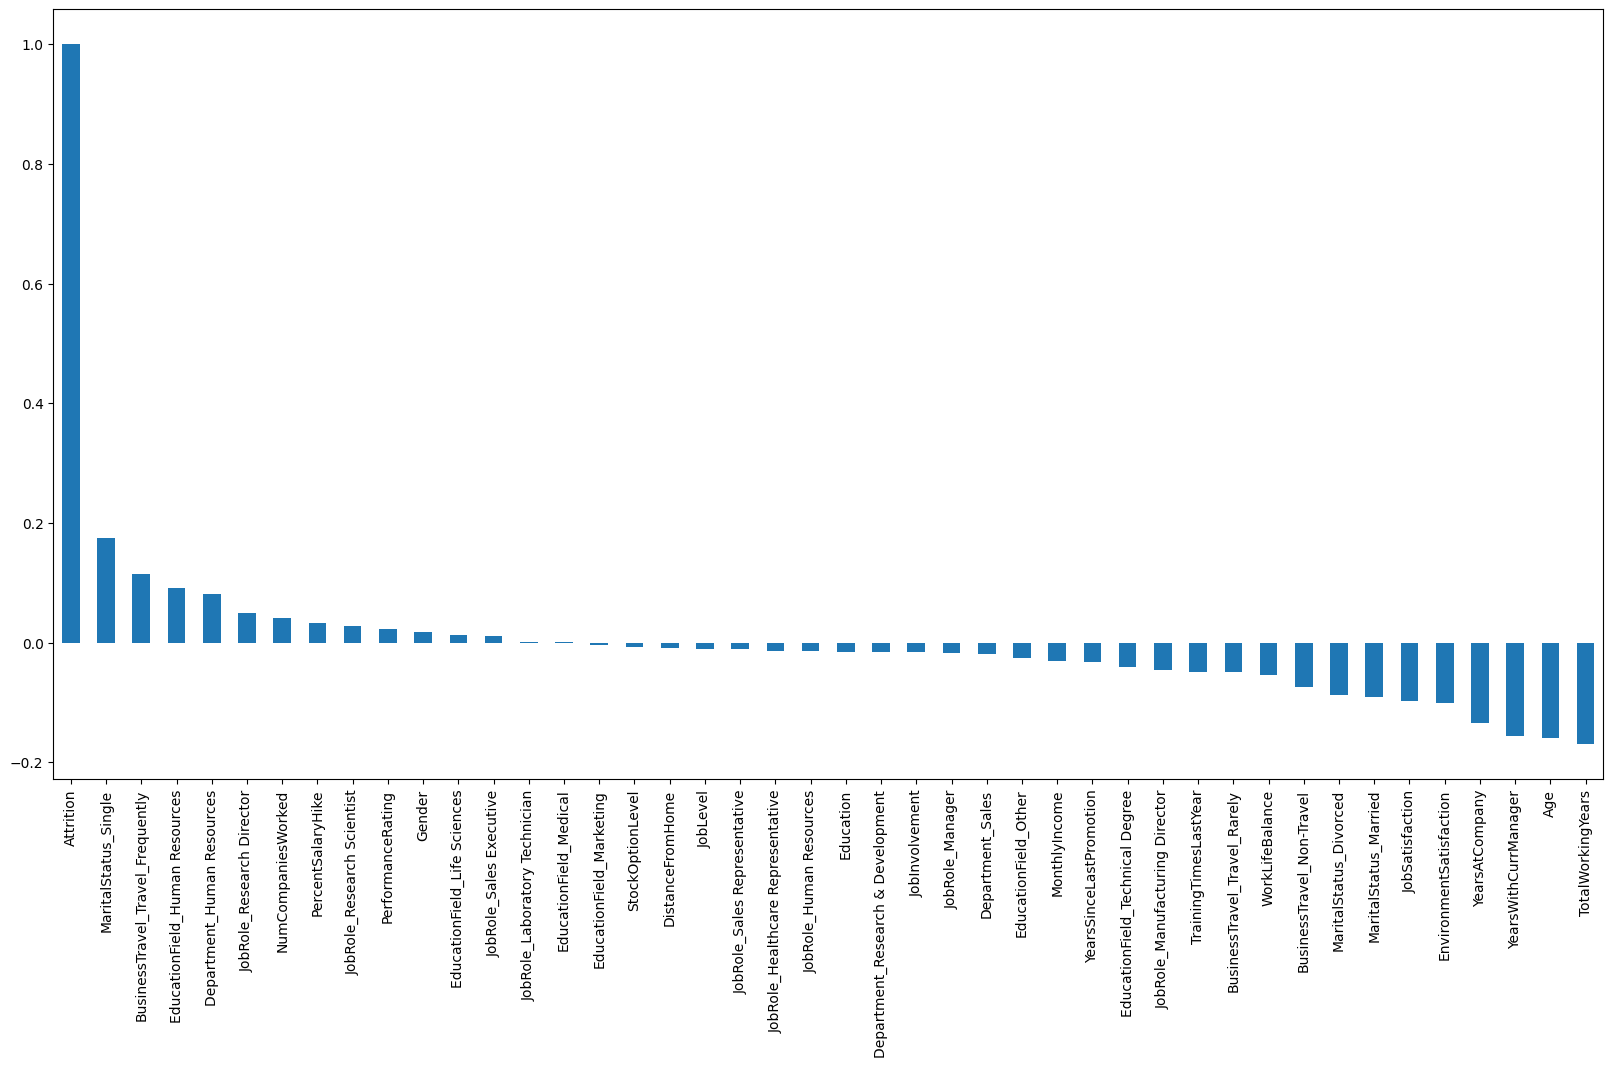

In [57]:
plt.figure(figsize=(20,10))
correlations=all_data_copy.corr()
correlations['Attrition'].sort_values(ascending = False).plot(kind='bar');

# Correlation Matrix

In [58]:
corr = all_data_copy[numerical_features].corr()

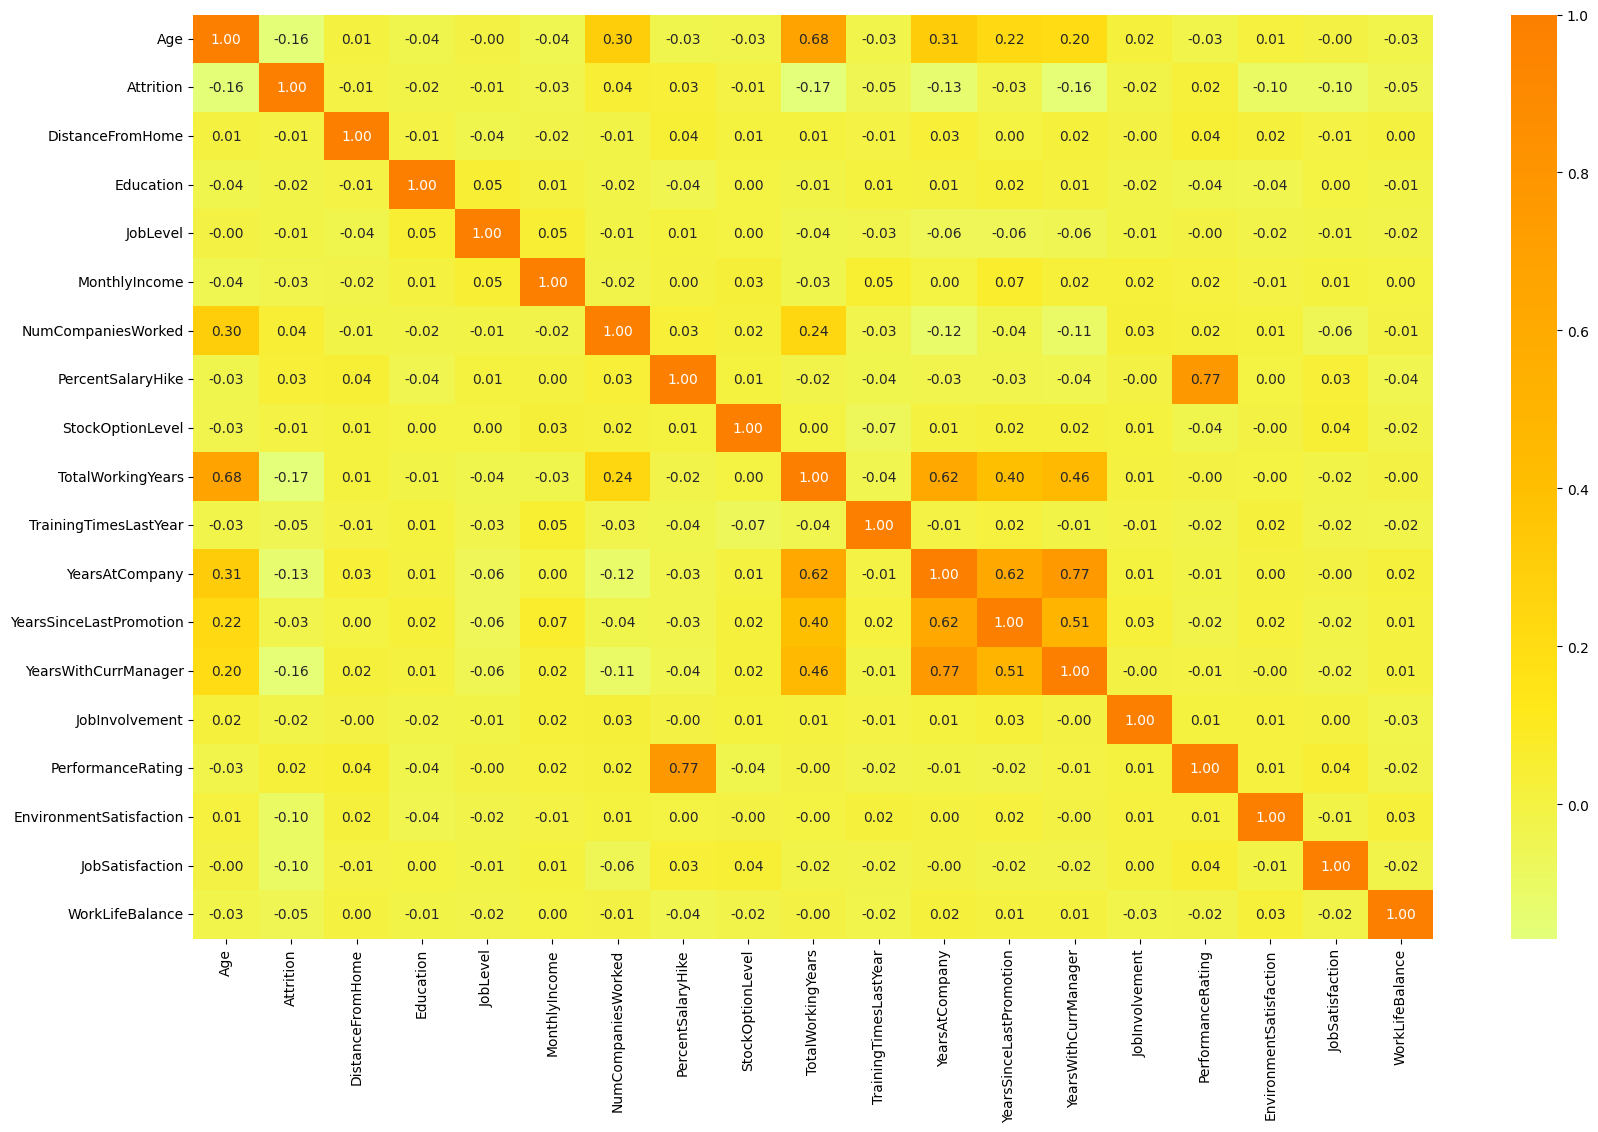

In [59]:
plt.figure(figsize=(20, 12),dpi=100)
sns.heatmap(corr, cmap = 'Wistia',annot= True, cbar=True , fmt='.2f');
plt.show()



```
# This is formatted as code
```

There are high correlations among some features:

PercentsalaryHie and PerformanceRating

YearsatCompany, YearsSinceLastPromotion, and YearsWithCurrManager

In [60]:
all_data_num= all_data[numerical_features]

In [61]:
all_data_num

,Age,Attrition,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,0,6,2,1,131160,1.0,11,0,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,1,10,1,1,41890,0.0,23,1,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,32,0,17,4,4,193280,1.0,15,3,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,38,0,2,5,3,83210,3.0,11,3,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,32,0,10,1,1,23420,4.0,12,2,9.0,2,6,0,4,3,3,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,5,4,1,60290,3.0,17,1,10.0,5,3,0,2,3,3,4.0,1.0,3.0
4406,29,0,2,4,1,26790,2.0,15,0,10.0,2,3,0,2,2,3,4.0,4.0,3.0
4407,25,0,25,2,2,37020,0.0,20,0,5.0,4,4,1,2,3,4,1.0,3.0,3.0
4408,42,0,18,2,1,23980,0.0,14,1,10.0,2,9,7,8,2,3,4.0,1.0,3.0


In [62]:
n = len(all_data_num)
m = len(all_data_num.columns) - 1

print("Number of Examples:", n)
print("Number Features:", m)

Number of Examples: 4410
Number Features: 18


In [63]:
label = "Attrition"
# numerical_features_reduced = np.array (["Age","Attrition", "JobLevel", "MonthlyIncome", "NumCompaniesWorked", "PercentSalaryHike",
#                                 "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany", "YearsSinceLastPromotion",
#                                 "YearsWithCurrManager","PerformanceRating","EnvironmentSatisfaction",
#                                 "JobSatisfaction","WorkLifeBalance"])
numerical_features_reduced = np.array(["Age","Attrition", "DistanceFromHome", "Education", "JobLevel", "MonthlyIncome", "NumCompaniesWorked",
                                "PercentSalaryHike","StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany", "YearsSinceLastPromotion",
                                "YearsWithCurrManager", "JobInvolvement","PerformanceRating","EnvironmentSatisfaction",
                                "JobSatisfaction","WorkLifeBalance"])

non_numerical_features = np.array([column for column in all_data.columns \
                                   if column not in numerical_features_reduced and \
                                     column != label])

In [64]:
all_data_num_red= all_data[numerical_features_reduced]
all_data_num_red.columns


Index(['Age', 'Attrition', 'DistanceFromHome', 'Education', 'JobLevel',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'WorkLifeBalance'],
      dtype='object')

In [65]:
non_numerical_features

array(['BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus'], dtype='<U14')

In [66]:
fig = px.scatter_matrix(all_data_num_red, dimensions=numerical_features_reduced, color=label)

fig.update_layout(width=(m + 1) * 100,
                 height=(m + 1) * 100,
                 margin=dict(l=0, r=0, t=0, b=0))

fig.show()

Some box plots to see data closely in terms of outliers

In [67]:
# fig=px.data.tips()
# fig = px.box(all_data, y = "TotalWorkingYears")
# fig.show()

In [68]:
# fig=px.data.tips()
# fig = px.box(all_data, y = "Age")
# fig.show()

In [69]:
# fig=px.data.tips()
# fig = px.box(all_data, y = "MonthlyIncome")
# fig.show()

"Attrition","Age", "JobLevel", "MonthlyIncome", "NumCompaniesWorked", "PercentSalaryHike",
                                "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany", "YearsSinceLastPromotion",
                                "YearsWithCurrManager","PerformanceRating","EnvironmentSatisfaction",
                                "JobSatisfaction","WorkLifeBalance"

In [70]:
# fig=px.data.tips()
# fig = px.box(all_data, y = "YearsAtCompany")
# fig.show()

In [71]:
# fig=px.data.tips()
# fig = px.box(all_data, y = "NumCompaniesWorked")
# fig.show()

In [72]:
# fig=px.data.tips()
# fig = px.box(all_data, y = "PercentSalaryHike")
# fig.show()

In [73]:
all_data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,0,1,Healthcare Representative,...,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,0,1,Research Scientist,...,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,32,0,Travel_Frequently,Research & Development,17,4,Other,1,4,Sales Executive,...,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,1,3,Human Resources,...,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,1,1,Sales Executive,...,9.0,2,6,0,4,3,3,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,Travel_Rarely,Research & Development,5,4,Medical,0,1,Research Scientist,...,10.0,5,3,0,2,3,3,4.0,1.0,3.0
4406,29,0,Travel_Rarely,Research & Development,2,4,Medical,1,1,Laboratory Technician,...,10.0,2,3,0,2,2,3,4.0,4.0,3.0
4407,25,0,Travel_Rarely,Research & Development,25,2,Life Sciences,1,2,Sales Executive,...,5.0,4,4,1,2,3,4,1.0,3.0,3.0
4408,42,0,Travel_Rarely,Sales,18,2,Medical,1,1,Laboratory Technician,...,10.0,2,9,7,8,2,3,4.0,1.0,3.0


There are high correlations among some features:

PercentsalaryHie and PerformanceRating

YearsatCompany, YearsSinceLastPromotion, and YearsWithCurrManager

# Train-Test Split

In [83]:
SCALING_FEATURES = ['Age', 'Attrition', 'DistanceFromHome', 'Education','JobLevel', 'MonthlyIncome', 'NumCompaniesWorked',
                     'PercentSalaryHike','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear','YearsAtCompany', 'YearsSinceLastPromotion',
                     'YearsWithCurrManager','JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction','JobSatisfaction', 'WorkLifeBalance']

TARGET = all_data ['Attrition']
X = all_data.drop(columns=['Attrition', 'YearsAtCompany','YearsSinceLastPromotion','PerformanceRating', 'YearsWithCurrManager'])
y = TARGET

# For k-NN Only need to split between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [84]:
X_train.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'JobInvolvement', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance'],
      dtype='object')

In [85]:
X_train_copy = X_train.copy()

In [86]:
y_train_copy = y_train.copy()
y_test_copy = y_test.copy()

In [87]:
y_train_copy

3385    0
3571    0
2281    0
2417    1
232     0
       ..
1175    0
255     1
2934    0
2191    0
318     0
Name: Attrition, Length: 3528, dtype: int64

In [88]:
X_train_copy

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
3385,38,Non-Travel,Sales,4,3,Life Sciences,1,2,Research Director,Single,100480,1.0,23,1,6.0,2,3,3.0,4.0,3.0
3571,27,Travel_Rarely,Research & Development,7,3,Life Sciences,1,3,Manufacturing Director,Married,34080,1.0,24,0,9.0,2,3,1.0,1.0,2.0
2281,28,Travel_Rarely,Sales,8,4,Marketing,1,1,Laboratory Technician,Divorced,163070,1.0,16,0,1.0,3,2,1.0,3.0,1.0
2417,32,Travel_Rarely,Sales,1,3,Life Sciences,1,2,Research Scientist,Single,27430,1.0,19,1,1.0,2,3,4.0,2.0,3.0
232,38,Travel_Rarely,Human Resources,2,4,Medical,1,1,Human Resources,Single,20140,3.0,17,1,8.0,5,4,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,25,Travel_Rarely,Research & Development,2,4,Medical,0,2,Manufacturing Director,Divorced,27850,0.0,21,0,6.0,2,3,1.0,3.0,2.0
255,20,Travel_Rarely,Research & Development,1,3,Life Sciences,1,5,Sales Representative,Single,61620,1.0,12,3,1.0,2,2,4.0,3.0,3.0
2934,29,Travel_Rarely,Sales,4,3,Other,0,2,Human Resources,Single,35390,1.0,18,0,6.0,2,2,3.0,4.0,3.0
2191,34,Travel_Rarely,Research & Development,5,3,Life Sciences,1,1,Research Scientist,Married,45530,4.0,18,1,10.0,2,4,2.0,3.0,3.0


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, cross_val_score


# Encoding

In [90]:
encoder = ColumnTransformer (transformers=[
         #('ohe', OneHotEncoder(drop='first', sparse=False),
          ('ordinal', OrdinalEncoder(),['BusinessTravel', 'Department', 'EducationField', 'Gender','JobRole', 'MaritalStatus']),  # One-hot encoding with drop_first=True for 'Gender'
    ],
    remainder='passthrough'  # Keep the other columns unchanged
)

# setting to get a pandas df
encoder.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal', OrdinalEncoder(),
                                 ['BusinessTravel', 'Department',
                                  'EducationField', 'Gender', 'JobRole',
                                  'MaritalStatus'])])

In [91]:
# Define the pipeline
pipe = Pipeline([
    ('preprocessing', encoder),  # Assuming `encoder` is your previously defined encoder
    ('scaling', MinMaxScaler()),  # Scaling step
    #('feature_selection', SelectKBest(score_func=chi2, k=15)),  # Feature selection step
])

In [93]:
pipe.fit(X_train_copy, y_train_copy)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal', OrdinalEncoder(),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole',
                                                   'MaritalStatus'])])),
                ('scaling', MinMaxScaler())])

In [94]:
# Transform both the training and testing data
X_train_transformed = pd.DataFrame(pipe.transform(X_train_copy))
X_test_transformed = pd.DataFrame(pipe.transform(X_test))

In [ ]:
X_train_transformed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,0.2,1.0,0.625,1.0,0.476190,0.107143,0.50,0.25,0.475987,0.111111,0.857143,0.333333,0.150,0.333333,0.666667,0.75,1.00,0.75
1,1.0,0.5,0.2,1.0,0.500,0.5,0.214286,0.214286,0.50,0.50,0.126330,0.111111,0.928571,0.000000,0.225,0.333333,0.666667,0.25,0.25,0.50
2,1.0,1.0,0.4,1.0,0.250,0.0,0.238095,0.250000,0.75,0.00,0.805582,0.111111,0.357143,0.000000,0.025,0.500000,0.333333,0.25,0.75,0.25
3,1.0,1.0,0.2,1.0,0.750,1.0,0.333333,0.000000,0.50,0.25,0.091311,0.111111,0.571429,0.333333,0.025,0.333333,0.666667,1.00,0.50,0.75
4,1.0,0.0,0.6,1.0,0.125,1.0,0.476190,0.035714,0.75,0.00,0.052923,0.333333,0.428571,0.333333,0.200,0.833333,1.000000,0.75,0.25,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3523,1.0,0.5,0.6,0.0,0.500,0.0,0.166667,0.035714,0.75,0.25,0.093523,0.000000,0.714286,0.000000,0.150,0.333333,0.666667,0.25,0.75,0.50
3524,1.0,0.5,0.2,1.0,1.000,1.0,0.047619,0.000000,0.50,1.00,0.271353,0.111111,0.071429,1.000000,0.025,0.333333,0.333333,1.00,0.75,0.75
3525,1.0,1.0,0.8,0.0,0.125,1.0,0.261905,0.107143,0.50,0.25,0.133228,0.111111,0.500000,0.000000,0.150,0.333333,0.333333,0.75,1.00,0.75
3526,1.0,0.5,0.2,1.0,0.750,0.5,0.380952,0.142857,0.50,0.00,0.186625,0.444444,0.500000,0.333333,0.250,0.333333,1.000000,0.50,0.75,0.75


In [95]:
X_train

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
3385,38,Non-Travel,Sales,4,3,Life Sciences,1,2,Research Director,Single,100480,1.0,23,1,6.0,2,3,3.0,4.0,3.0
3571,27,Travel_Rarely,Research & Development,7,3,Life Sciences,1,3,Manufacturing Director,Married,34080,1.0,24,0,9.0,2,3,1.0,1.0,2.0
2281,28,Travel_Rarely,Sales,8,4,Marketing,1,1,Laboratory Technician,Divorced,163070,1.0,16,0,1.0,3,2,1.0,3.0,1.0
2417,32,Travel_Rarely,Sales,1,3,Life Sciences,1,2,Research Scientist,Single,27430,1.0,19,1,1.0,2,3,4.0,2.0,3.0
232,38,Travel_Rarely,Human Resources,2,4,Medical,1,1,Human Resources,Single,20140,3.0,17,1,8.0,5,4,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,25,Travel_Rarely,Research & Development,2,4,Medical,0,2,Manufacturing Director,Divorced,27850,0.0,21,0,6.0,2,3,1.0,3.0,2.0
255,20,Travel_Rarely,Research & Development,1,3,Life Sciences,1,5,Sales Representative,Single,61620,1.0,12,3,1.0,2,2,4.0,3.0,3.0
2934,29,Travel_Rarely,Sales,4,3,Other,0,2,Human Resources,Single,35390,1.0,18,0,6.0,2,2,3.0,4.0,3.0
2191,34,Travel_Rarely,Research & Development,5,3,Life Sciences,1,1,Research Scientist,Married,45530,4.0,18,1,10.0,2,4,2.0,3.0,3.0


# Resampling

In [96]:
sm = SMOTE(random_state=25)
X_smote, y_smote = sm.fit_resample(X_train_transformed, y_train_copy)

In [97]:
X_smote

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,0.200000,1.0,0.625000,1.000000,0.476190,0.107143,0.500000,0.250000,0.475987,0.111111,0.857143,0.333333,0.150000,0.333333,0.666667,0.75,1.000000,0.750000
1,1.0,0.5,0.200000,1.0,0.500000,0.500000,0.214286,0.214286,0.500000,0.500000,0.126330,0.111111,0.928571,0.000000,0.225000,0.333333,0.666667,0.25,0.250000,0.500000
2,1.0,1.0,0.400000,1.0,0.250000,0.000000,0.238095,0.250000,0.750000,0.000000,0.805582,0.111111,0.357143,0.000000,0.025000,0.500000,0.333333,0.25,0.750000,0.250000
3,1.0,1.0,0.200000,1.0,0.750000,1.000000,0.333333,0.000000,0.500000,0.250000,0.091311,0.111111,0.571429,0.333333,0.025000,0.333333,0.666667,1.00,0.500000,0.750000
4,1.0,0.0,0.600000,1.0,0.125000,1.000000,0.476190,0.035714,0.750000,0.000000,0.052923,0.333333,0.428571,0.333333,0.200000,0.833333,1.000000,0.75,0.250000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5893,0.5,1.0,0.200000,1.0,0.626937,1.000000,0.197552,0.083149,0.500000,0.250000,0.270480,0.185759,0.475453,0.223944,0.075387,0.500000,0.442723,0.50,0.414084,0.582042
5894,0.5,0.5,0.800000,1.0,0.000000,0.500000,0.285714,0.285714,0.500000,0.250000,0.306266,0.111111,0.214286,0.000000,0.025000,0.333333,0.666667,0.50,0.250000,1.000000
5895,1.0,0.5,0.900427,1.0,0.562767,1.000000,0.226241,0.706006,0.500000,0.062233,0.896930,0.278015,0.286019,0.416311,0.162447,0.708155,0.666667,1.00,0.812233,0.750000
5896,1.0,0.5,0.200000,1.0,0.875000,0.823235,0.253487,0.199853,0.588382,0.088382,0.194465,0.039281,0.142857,0.000000,0.121971,0.500000,0.215490,0.75,0.838382,0.500000


In [98]:
y_smote

0       0
1       0
2       0
3       1
4       0
       ..
5893    1
5894    1
5895    1
5896    1
5897    1
Name: Attrition, Length: 5898, dtype: int64

# **KNN-Classifier**

In [99]:
knn15 = neighbors.KNeighborsClassifier(n_neighbors=15)
knn15.fit(X_train_transformed, y_train_copy)
knn15.fit(X_smote, y_smote)

KNeighborsClassifier(n_neighbors=15)

In [100]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=74)
n_scores = cross_val_score(knn15, X_train_transformed, y_train_copy, scoring='accuracy', cv=cv, n_jobs=1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.840 (0.009)


In [101]:
yhat_X_test = knn15.predict(X_test_transformed)
accuracy_score(y_test_copy, yhat_X_test)

0.7006802721088435

In [102]:
yhat_train = knn15.predict(X_train_transformed)

print("Training data:")
print(classification_report(y_train_copy, yhat_train))

Training data:
              precision    recall  f1-score   support

           0       1.00      0.70      0.82      2949
           1       0.39      0.98      0.56       579

    accuracy                           0.75      3528
   macro avg       0.69      0.84      0.69      3528
weighted avg       0.90      0.75      0.78      3528



In [103]:
print("TEST data:")
print(classification_report(y_test, yhat_X_test))

TEST data:
              precision    recall  f1-score   support

           0       0.98      0.66      0.79       750
           1       0.33      0.93      0.48       132

    accuracy                           0.70       882
   macro avg       0.65      0.80      0.64       882
weighted avg       0.88      0.70      0.74       882



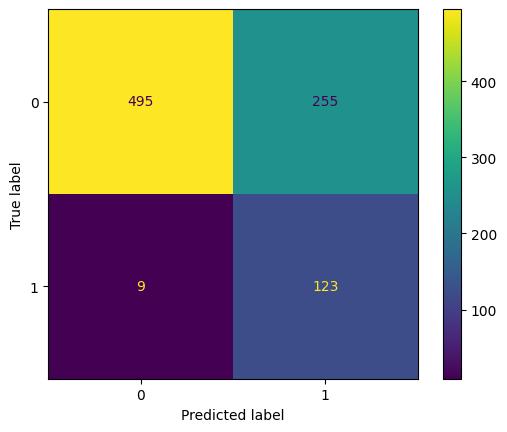

In [104]:
knn15_cm = confusion_matrix(y_test, yhat_X_test, labels=knn15.classes_)
knn15_disp = ConfusionMatrixDisplay(confusion_matrix=knn15_cm,
                                  display_labels=knn15.classes_)

# Plot confusion matrix
knn15_disp.plot(values_format='')

# Display plot
plt.show()

# Logistic Regression

In [105]:
# Initialize and train the model
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(max_iter=10000)
# lg.fit(X_train_transformed, y_train_copy)\
lg.fit(X_smote, y_smote)


yhat_train = lg.predict(X_train_transformed)

print("Training data:")
print(classification_report(y_train_copy, yhat_train))

# Predict on the testing set
yhat_test = lg.predict(X_test_transformed)

# Evaluate the model
print("Test data:")
print(classification_report(y_test_copy, yhat_test))

accuracy = accuracy_score(y_test, yhat_test)
print(f'Accuracy: {accuracy}')

Training data:
              precision    recall  f1-score   support

           0       0.92      0.68      0.78      2949
           1       0.30      0.69      0.42       579

    accuracy                           0.68      3528
   macro avg       0.61      0.69      0.60      3528
weighted avg       0.82      0.68      0.72      3528

Test data:
              precision    recall  f1-score   support

           0       0.92      0.67      0.78       750
           1       0.26      0.67      0.38       132

    accuracy                           0.67       882
   macro avg       0.59      0.67      0.58       882
weighted avg       0.82      0.67      0.72       882

Accuracy: 0.671201814058957


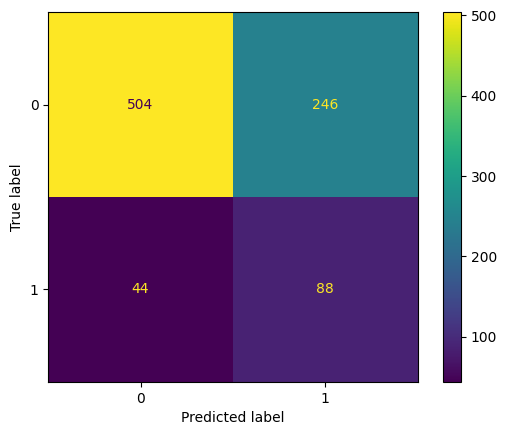

In [106]:
log_cm = confusion_matrix(y_test, yhat_test, labels=lg.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                  display_labels=lg.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

# Decision Tree **Classifier**

# Function for plotting


In [107]:
#Some useful functions for ploting our results as we go  ----Courstesy of Brett G.----Thanks for the heavy lifting!----
def plotLearningCurve(training_scores, validation_scores, data_sizes, title=''):
  training_mean = training_scores.mean(axis=1)
  training_standard_deviation = training_scores.std(axis=1)

  validation_mean = validation_scores.mean(axis=1)
  validation_standard_deviation = validation_scores.std(axis=1)

  fig = go.Figure()

  fig.add_trace(go.Scatter(x=data_sizes,
                          y=training_mean,
                          mode='lines',
                          name='Training',
                          line=dict(color='red')))
  fig.add_trace(go.Scatter(x=data_sizes,
                          y=training_mean - training_standard_deviation,
                          mode='lines',
                          name='Training lower bound',
                          line=dict(width=0, color='red'),
                          showlegend=False))
  fig.add_trace(go.Scatter(x=data_sizes,
                          y=training_mean + training_standard_deviation,
                          mode='lines',
                          name='Training upper bound',
                          line=dict(width=0, color='red'),
                          fill='tonexty',
                          fillcolor='rgba(255, 0, 0, 0.3)',
                          showlegend=False))

  fig.add_trace(go.Scatter(x=data_sizes,
                          y=validation_mean,
                          mode='lines',
                          name='Test',
                          line=dict(color='blue')))
  fig.add_trace(go.Scatter(x=data_sizes,
                          y=validation_mean - validation_standard_deviation,
                          mode='lines',
                          name='Test lower bound',
                          line=dict(width=0, color='blue'),
                          showlegend=False))
  fig.add_trace(go.Scatter(x=data_sizes,
                          y=validation_mean + validation_standard_deviation,
                          mode='lines',
                          name='Test upper bound',
                          line=dict(width=0, color='blue'),
                          fill='tonexty',
                          fillcolor='rgba(0, 0, 255, 0.3)',
                          showlegend=False))

  fig.update_layout(title='Learning Curve',
                  xaxis_title=title,
                  yaxis_title='Accuracy')
  fig.show()

In [108]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier() #Criterion Default is 'gini'
#dtree.fit(X_train_transformed, y_train_copy)
dtree.fit(X_smote, y_smote)

DecisionTreeClassifier()

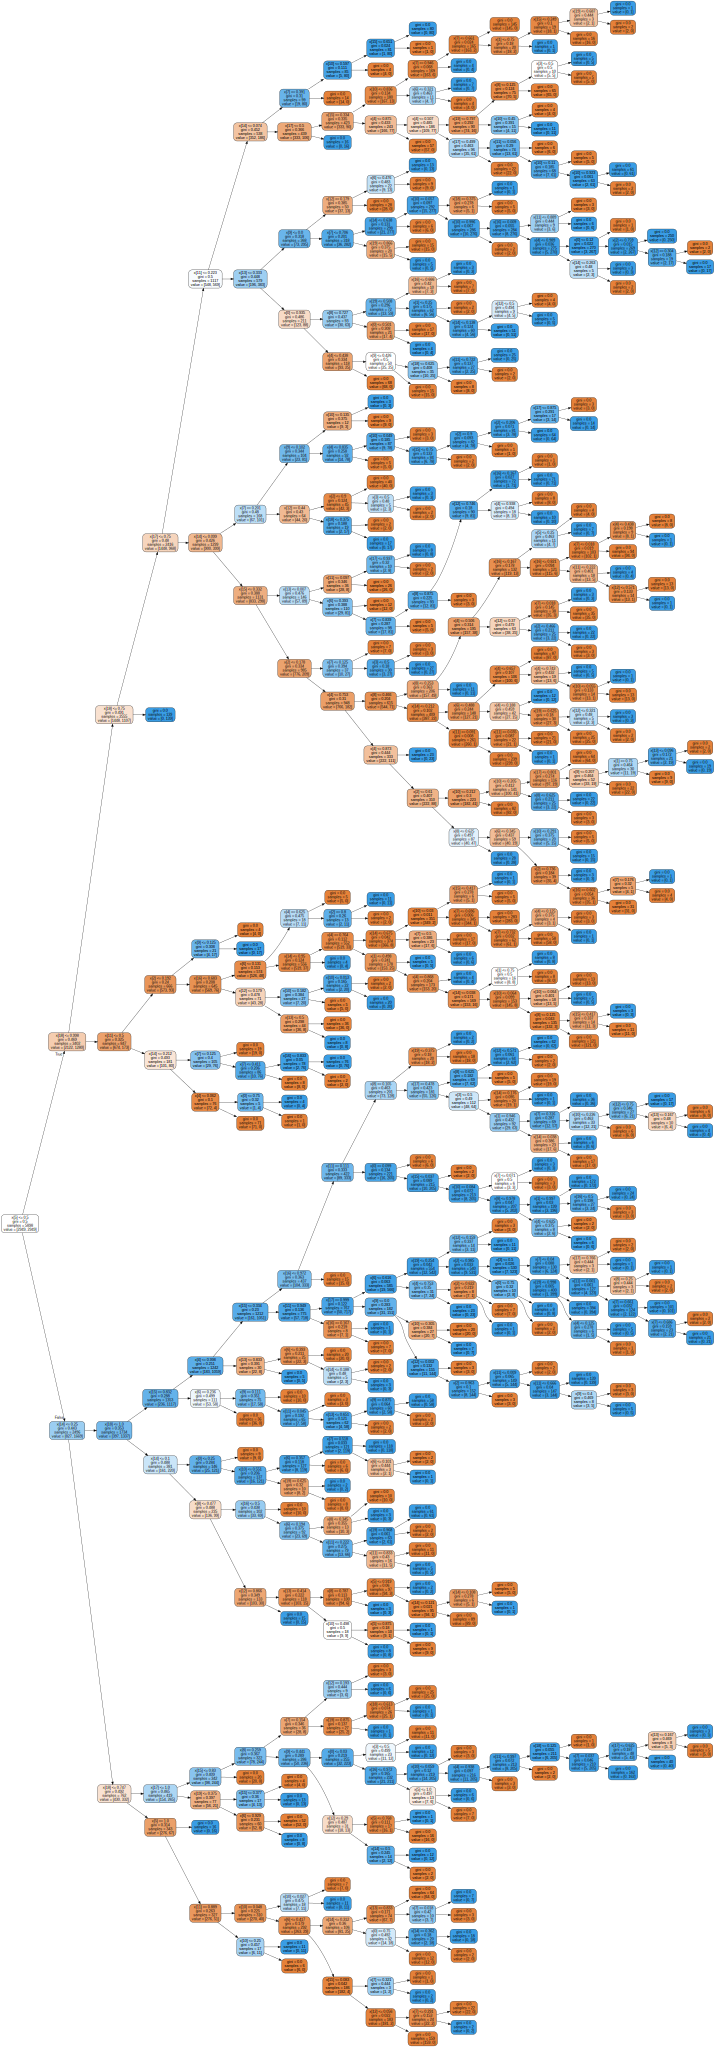

In [109]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(dtree,
                           out_file=None,
                           filled=True,
                           rounded=True,
                           rotate=True)

display(graphviz.Source(dot_data))

In [110]:
from sklearn.metrics import classification_report, confusion_matrix

yhat_train = dtree.predict(X_train_transformed)

print("Training data:")
print(classification_report(y_train_copy, yhat_train))

Training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2949
           1       1.00      1.00      1.00       579

    accuracy                           1.00      3528
   macro avg       1.00      1.00      1.00      3528
weighted avg       1.00      1.00      1.00      3528



In [111]:
yhat_test  = dtree.predict(X_test_transformed)

print("Test data:")
print(classification_report(y_test_copy, yhat_test))

Test data:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       750
           1       0.97      1.00      0.99       132

    accuracy                           1.00       882
   macro avg       0.99      1.00      0.99       882
weighted avg       1.00      1.00      1.00       882



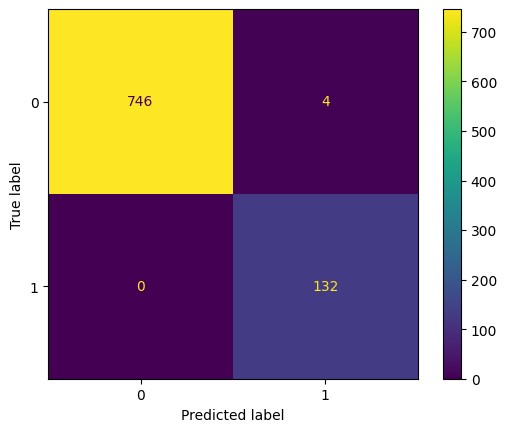

In [112]:
dt_cm = confusion_matrix(y_test, yhat_test, labels=dtree.classes_)
dt_disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm,
                                  display_labels=dtree.classes_)

# Plot confusion matrix
dt_disp.plot(values_format='')

# Display plot
plt.show()

In [113]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='entropy')
#dtree.fit(X_train_transformed, y_train_copy)
dtree.fit(X_smote, y_smote)

DecisionTreeClassifier(criterion='entropy')

In [114]:
from sklearn.metrics import classification_report, confusion_matrix

yhat_train = dtree.predict(X_train_transformed)


print("Training data:")
print(classification_report(y_train_copy, yhat_train))

Training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2949
           1       1.00      1.00      1.00       579

    accuracy                           1.00      3528
   macro avg       1.00      1.00      1.00      3528
weighted avg       1.00      1.00      1.00      3528



In [115]:
yhat_test  = dtree.predict(X_test_transformed)

print("Test data:")
print(classification_report(y_test_copy, yhat_test))

Test data:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       750
           1       0.93      1.00      0.96       132

    accuracy                           0.99       882
   macro avg       0.96      0.99      0.98       882
weighted avg       0.99      0.99      0.99       882



No difference between gini and entropy as a criterion.

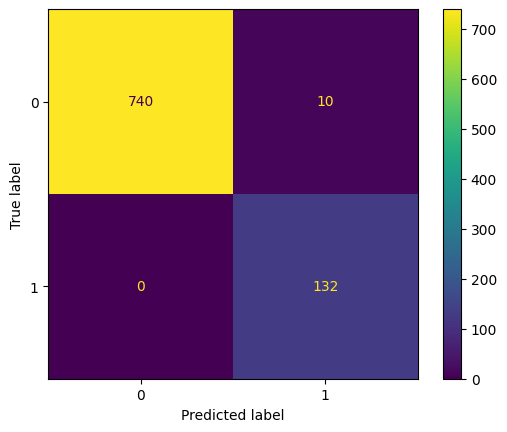

In [116]:
dt_cm = confusion_matrix(y_test, yhat_test, labels=dtree.classes_)
dt_disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm,
                                  display_labels=dtree.classes_)

# Plot confusion matrix
dt_disp.plot(values_format='')

# Display plot
plt.show()

In [ ]:
# y_train_predict=dtree.predict(X_smote)

In [ ]:
# accuracy_score(y_smote,y_train_predict)

In [117]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth= 15, min_samples_leaf=1, min_samples_split= 2)
dtree.fit(X_smote, y_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=15)

In [118]:
from sklearn.metrics import classification_report, confusion_matrix

yhat_train = dtree.predict(X_train_transformed)

print("Training data:")
print(classification_report(y_train_copy, yhat_train))

Training data:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2949
           1       0.96      0.99      0.98       579

    accuracy                           0.99      3528
   macro avg       0.98      0.99      0.99      3528
weighted avg       0.99      0.99      0.99      3528



In [119]:
yhat_test  = dtree.predict(X_test_transformed)

print("Test data:")
print(classification_report(y_test_copy, yhat_test))

Test data:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       750
           1       0.89      0.99      0.94       132

    accuracy                           0.98       882
   macro avg       0.94      0.98      0.96       882
weighted avg       0.98      0.98      0.98       882



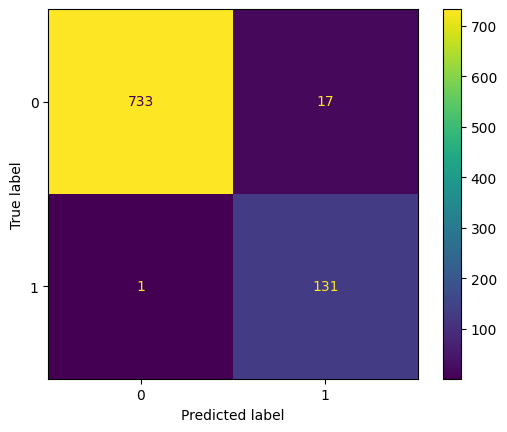

In [120]:
dt_cm = confusion_matrix(y_test, yhat_test, labels=dtree.classes_)
dt_disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm,
                                  display_labels=dtree.classes_)

# Plot confusion matrix
dt_disp.plot(values_format='')

# Display plot
plt.show()

## GridsearchCv- Hyperparameter tuning for Decison Classifier

In [121]:
from sklearn.model_selection import GridSearchCV
params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 20)),
}

In [122]:
# tree_clf = DecisionTreeClassifier(random_state=3)
# tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
# tree_cv.fit(X_smote,y_smote)
# best_params = tree_cv.best_params_
# print(f"Best paramters: {best_params})")

Without smot technique. With ordinal encoding and minmax.

Best paramters: {'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'})

With smot technique. With ordinal encoding and minmax.

Best paramters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})


# Random Forest Classifier

In [123]:
from sklearn.ensemble import RandomForestClassifier
RF_class = RandomForestClassifier()
RF_class.fit(X_smote,y_smote)
y_pred_train_clssfr = RF_class.predict(X_train_transformed)

In [124]:
y_pred_test_clssfr = RF_class.predict(X_test_transformed)

In [125]:
print('\033[1mRandomForestClassifier:\033[0m')
print()
print("Results on training data:")
print(classification_report(y_train_copy, y_pred_train_clssfr))
print()
print("Results on test data:")
print(classification_report(y_test_copy, y_pred_test_clssfr))

RandomForestClassifier:

Results on training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2949
           1       1.00      1.00      1.00       579

    accuracy                           1.00      3528
   macro avg       1.00      1.00      1.00      3528
weighted avg       1.00      1.00      1.00      3528


Results on test data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       750
           1       1.00      0.98      0.99       132

    accuracy                           1.00       882
   macro avg       1.00      0.99      0.99       882
weighted avg       1.00      1.00      1.00       882



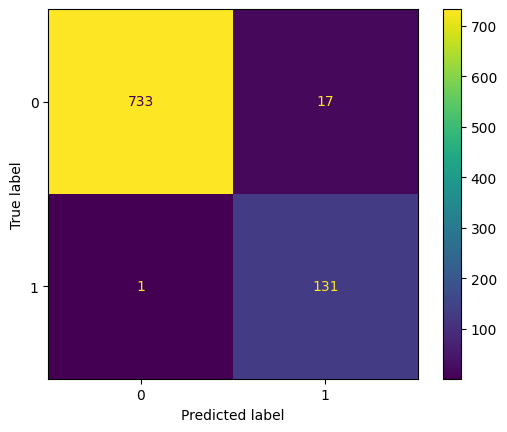

In [126]:
rf_cm = confusion_matrix(y_test, yhat_test, labels=RF_class.classes_)
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm,
                                  display_labels=RF_class.classes_)

# Plot confusion matrix
rf_disp.plot(values_format='')

# Display plot
plt.show()